In [2]:
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
data = xr.DataArray(np.random.rand(2, 3), dims=['x', 'y'], coords={ 'x': [10, 20] })
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.44705813, 0.84393367, 0.44736896],
       [0.12538903, 0.54608328, 0.706658  ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [4]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [5]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [6]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Indexing

Xarray provides 4 ways of indexing:
- Label based indexing along the provided dimension
- Slice indexing
- `loc[...]/iloc[...]` indexing
- `sel(<dim_name>=...)/isel(<dim_name>=...)`

Note that, if we have a dimension called `x`, the difference between `sel` and `isel` is the following:
- `sel` is meant to be used specifying a coordinate name, for example if we have 2 coordinate for the `x` dimension, `(10,20)`, using `sel` we must specify `10` or `20`, the coorindates name &rarr; `da.sel(x=10)`.
- `isel` does not consider coordinates labels, but the integer based index of the "array" of coordinates, so if we want to replicate the same example as above, we should have written `ds.isel(x=0)`.

In [7]:
data.loc[10] # indexing by coordinates name

<xarray.DataArray (y: 3)>
array([0.44705813, 0.84393367, 0.44736896])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [8]:
data.isel(y=0) # integere select: by dimension name and INTEGERER

<xarray.DataArray (x: 2)>
array([0.44705813, 0.12538903])
Coordinates:
  * x        (x) int64 10 20

In [9]:
data.sel(x=10) # Select, by dimension name and LABEL

<xarray.DataArray (y: 3)>
array([0.44705813, 0.84393367, 0.44736896])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [10]:
attrs = {
    "long_name": "random_velocity",
    "untis": "metres/sec",
    "description": "A random variaible",
    "random_attr": 123
}

data.attrs = attrs
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.44705813, 0.84393367, 0.44736896],
       [0.12538903, 0.54608328, 0.706658  ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

## Computation

In [11]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.44705813, 10.84393367, 10.44736896],
       [10.12538903, 10.54608328, 10.706658  ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [12]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[0.43231466, 0.74726293, 0.43259492],
       [0.12506071, 0.51934413, 0.64929569]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

In [13]:
data.sum()

<xarray.DataArray ()>
array(3.11649106)

In [14]:
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
a

<xarray.DataArray (y: 3)>
array([-1.32588508,  0.55593658, -0.05773384])
Coordinates:
  * y        (y) int64 0 1 2

In [15]:

b = xr.DataArray(np.random.randn(4), dims="z")
b

<xarray.DataArray (z: 4)>
array([ 0.73975692, -0.16495076,  0.88204005, -0.47431027])
Dimensions without coordinates: z

In [16]:
c = a + b
c

<xarray.DataArray (y: 3, z: 4)>
array([[-0.58612816, -1.49083584, -0.44384503, -1.80019535],
       [ 1.2956935 ,  0.39098582,  1.43797663,  0.08162631],
       [ 0.68202308, -0.2226846 ,  0.82430621, -0.53204411]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

In [17]:
np.random.randn(3)[:, np.newaxis] + np.random.randn(2)[np.newaxis, :]

array([[ 1.27712619, -0.64762223],
       [ 0.816005  , -1.10874342],
       [ 0.3540402 , -1.57070821]])

## Group By

In [18]:
labels = xr.DataArray(["E", "F", "E"], dims="y", name="labels")
data.groupby(labels).mean("y")

<xarray.DataArray (x: 2, labels: 2)>
array([[0.44721354, 0.84393367],
       [0.41602351, 0.54608328]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

In [19]:
data.groupby(labels).map(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[0.3216691 , 0.29785038, 0.32197993],
       [0.        , 0.        , 0.58126897]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

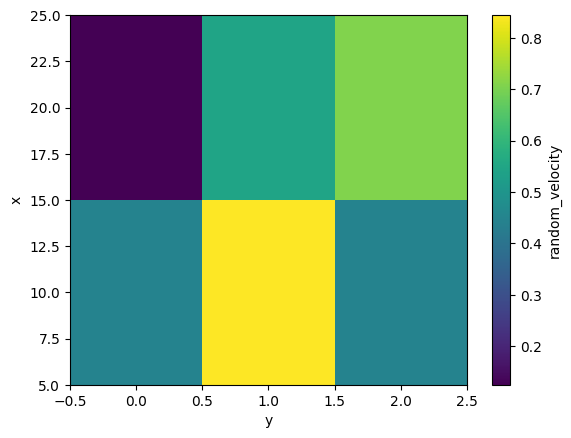

In [20]:
data.plot()

In [21]:
data.groupby(labels).sum().to_series()

x   labels
10  E         0.894427
    F         0.843934
20  E         0.832047
    F         0.546083
dtype: float64

# Datasets

In [22]:
ds = xr.Dataset({
    "foo": data,
    "bar": ("x", [1, 2]), # sharing x coord with above data
    "baz": np.pi,
})
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.4471 0.8439 0.4474 0.1254 0.5461 0.7067
    bar      (x) int64 1 2
    baz      float64 3.142

In [23]:
ds['bar'].sel(x=20)

<xarray.DataArray 'bar' ()>
array(2)
Coordinates:
    x        int64 20

## DataArray

In [24]:
# creating a data array in it's complete form
data = np.random.randn(4, 3)

locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)

# only data is required, all of the other argumenst, if not provided, will be 
# filled with default values
arr = xr.DataArray(data, coords=[times, locs], dims=["time", "space"], name="foo")

# akshually, only dimensions have default values, coordinates does not.
# != from pandas that always auto index data
arr

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[-0.54611901,  0.00955155, -1.76336002],
       [ 0.6156206 , -1.52172354,  0.94912141],
       [ 0.26836551, -1.37384629, -1.50829585],
       [-0.735557  , -0.4656523 ,  0.60454957]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

Coordinates can be specified in the following ways:
- A **list of values** with lenght wqual to the number fo dimnesion, providing coordinate labels for each dimension. Each value must be of one of the following:
  - A `DataArray` or `Variabile` class members
  - A tuple of the form `(dims, data[, attrs])` wich is converted into arguments for `Variable`
  - A *pandas* object or scalar value.
  - A 1D array or list, which is interpreted as values for a one dimensional cooridnate variable along the same dimension as it's name.
- A **dictionary** of `{coord_name: coord}` where values are of the same form as the list. Supplying coordinates as a dict allows other coordinates than those corresponding to dimensions. If you supply `coords` as a dict, you MUST provide `dims`.

In [25]:
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[-0.54611901,  0.00955155, -1.76336002],
       [ 0.6156206 , -1.52172354,  0.94912141],
       [ 0.26836551, -1.37384629, -1.50829585],
       [-0.735557  , -0.4656523 ,  0.60454957]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [26]:
xr.DataArray(
    data,
    coords={
    "time": times,
    "space": locs,
    "const": 42,
    "ranking": ("space", [1, 2, 3]),
    },
    dims=["time", "space"]
)

<xarray.DataArray (time: 4, space: 3)>
array([[-0.54611901,  0.00955155, -1.76336002],
       [ 0.6156206 , -1.52172354,  0.94912141],
       [ 0.26836551, -1.37384629, -1.50829585],
       [-0.735557  , -0.4656523 ,  0.60454957]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (space) int64 1 2 3

In [27]:
# Dictionary with coords across multiple dimensions
xr.DataArray(
    data,
    coords={
        "time":times,
        "space": locs,
        "const": 42,
        "rankin": (("time", "space"), np.arange(12).reshape(4, 3)),
    },
    dims=["time", "space"]
)

<xarray.DataArray (time: 4, space: 3)>
array([[-0.54611901,  0.00955155, -1.76336002],
       [ 0.6156206 , -1.52172354,  0.94912141],
       [ 0.26836551, -1.37384629, -1.50829585],
       [-0.735557  , -0.4656523 ,  0.60454957]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    rankin   (time, space) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [28]:
# Constructor by pandas Data Structure
df = pd.DataFrame({ "x": [0, 1], "y": [2, 3]}, index=["a", "b"])
df.index.name = "abc"
df.columns.name = "xyz"
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [29]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]])
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

In [30]:
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.4471 0.8439 0.4474 0.1254 0.5461 0.7067
    bar      (x) int64 1 2
    baz      float64 3.142

In [31]:
arr.values = 1.0 * arr.values

## DataSet

In addition to the dict-like interface of the dataset itself (which can be used to access any valiable in a dataset)
datasets have four key properties:
- `dims`: dictionary mapping from dim names to the fixed legth of dimensions.
- `data_vars`: dict-like container of DataArrays corresponding to variabels.
- `coords`: container of DAtaArrays intended to label points used in `data_vars`
- `attrs`: this holds aribitrary metadata.

In [32]:
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.randn(2, 2, 3)

lon = [[-99.83, -99.32], [-99.79, 99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

In [33]:
ds = xr.Dataset(
    {
        # Data Variables as (coords, data)
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    }
)

ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.22 2.007 25.59 ... 20.57 24.5 6.682
    precipitation   (x, y, time) float64 8.181 10.35 10.16 ... 3.151 11.07 9.033

In [36]:
ds["temperature"] # extrating temperature DataArray

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[22.22303757,  2.00689368, 25.59220261],
        [11.80115491, 21.87754908, -2.08000517]],

       [[11.76366836, 23.30955341, 21.40812276],
        [20.56627918, 24.50402596,  6.68223065]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [42]:
print(ds.coords)
print("------------")
print(ds.data_vars)

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Data variables:
    temperature    (x, y, time) float64 22.22 2.007 25.59 ... 20.57 24.5 6.682
    precipitation  (x, y, time) float64 8.181 10.35 10.16 ... 3.151 11.07 9.033
